In [1]:
# multi-class classification

In [2]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


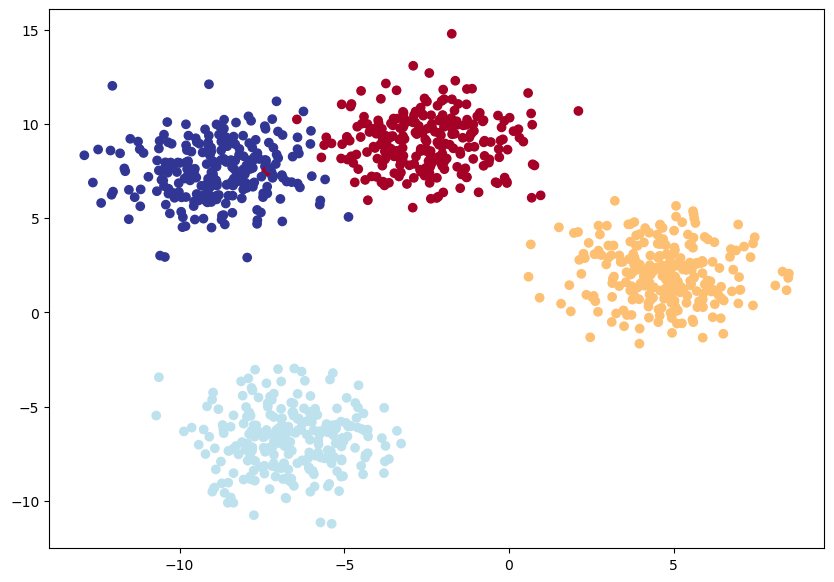

In [4]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# create multi class data
X_blob, y_blob = make_blobs(n_samples=1000,
                             centers=NUM_CLASSES,
                           n_features=NUM_FEATURES,
                           cluster_std=1.5,
                            random_state=RANDOM_SEED
                           
                           )
# turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# split into train and test
X_blob_train,X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,y_blob,test_size=0.2,random_state=RANDOM_SEED)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [6]:
from torch import nn

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """initialize multi-class classification model

         Args:
         input_features (int): Number of input features of the model
         output_features (int): Number of output features of the model (mumber of classes_
         hidden_units(int): number of hidden units between layers, default 8

         returns
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
    def forward(self,x):
        return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2, output_features=4,hidden_units=8 ).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [7]:
# create loss function and optimizer for multi-class classification
# use cross entropy loss of multi-class

loss_fn = nn.CrossEntropyLoss()

# create optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)


In [8]:
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

In [9]:
# in order to evaluate and train, need to convert model output to predicitions probabilities then to prediction labels

In [10]:
# logits-> pred -> labels

In [11]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))

# get predicition probabilibilites 
y_logits[0:10]

tensor([[ 0.1952,  0.3308, -0.0565, -0.0507],
        [ 0.1369,  0.1129, -0.2076,  0.3474],
        [ 1.6386, -0.0979, -1.3168, -0.2232],
        [ 0.2048,  0.3282, -0.0724, -0.0640],
        [ 0.0666,  0.1616, -0.1193,  0.1933],
        [ 0.1561,  0.0906, -0.2213,  0.4314],
        [ 1.6681, -0.1220, -1.2765, -0.2325],
        [ 0.0635,  0.1415, -0.1228,  0.2528],
        [ 1.7857, -0.1509, -1.4506, -0.2141],
        [ 0.0592,  0.1492, -0.1213,  0.2233]], device='cuda:0')

In [12]:
y_pred_probs = torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])
# four columns becase of 4 classes

tensor([[ 0.1952,  0.3308, -0.0565, -0.0507],
        [ 0.1369,  0.1129, -0.2076,  0.3474],
        [ 1.6386, -0.0979, -1.3168, -0.2232],
        [ 0.2048,  0.3282, -0.0724, -0.0640],
        [ 0.0666,  0.1616, -0.1193,  0.1933]], device='cuda:0')
tensor([[0.2699, 0.3091, 0.2099, 0.2111],
        [0.2551, 0.2491, 0.1808, 0.3149],
        [0.7227, 0.1273, 0.0376, 0.1123],
        [0.2737, 0.3097, 0.2074, 0.2092],
        [0.2460, 0.2705, 0.2043, 0.2792]], device='cuda:0')


In [13]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [14]:
# the largest prediction out of the group
torch.max(y_pred_probs[0])

tensor(0.3091, device='cuda:0')

In [15]:
# get column of the largest prediction 
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

In [16]:
# convert model's predictions to labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 3, 0, 1, 3, 3, 0, 3, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 1, 0,
        0, 0, 3, 3, 1, 3, 3, 1, 1, 3, 1, 0, 1, 3, 3, 0, 3, 3, 3, 0, 3, 3, 1, 1,
        3, 3, 1, 3, 1, 1, 3, 0, 1, 1, 3, 0, 0, 1, 3, 0, 0, 3, 3, 3, 3, 1, 1, 3,
        3, 3, 0, 3, 3, 3, 3, 1, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 0, 3, 3, 3, 3, 0, 3, 1, 3, 3, 0, 1, 1, 3, 0, 0, 3, 3, 1, 1, 0,
        0, 3, 1, 1, 0, 3, 3, 3, 0, 3, 1, 0, 3, 0, 3, 3, 3, 3, 1, 1, 1, 3, 0, 0,
        0, 0, 3, 3, 3, 0, 0, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 3, 3, 0, 3, 3, 0, 3,
        0, 0, 0, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 0, 0, 1, 0, 0, 3, 1, 0, 0, 3, 3,
        1, 3, 0, 3, 3, 1, 0, 1], device='cuda:0')

In [17]:
# compare model label to test label
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [18]:
# calculat accuracy at the same time
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [22]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    # train
    model_4.train()
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits,y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits,y_blob_test )
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_preds)

    if epoch %10 == 0:
        print(f"{epoch}, {loss:}, {acc:.2f}, {test_loss:.5f}, {test_acc:.2f}%")



0, 1.3349908590316772, 50.25, 1.16305, 49.00%
10, 0.548504114151001, 93.00, 0.49208, 97.00%
20, 0.2548213303089142, 99.25, 0.22536, 99.50%
30, 0.11615755409002304, 99.12, 0.10187, 99.50%
40, 0.07149919867515564, 99.38, 0.06116, 99.50%
50, 0.053884655237197876, 99.12, 0.04443, 99.50%
60, 0.04508773982524872, 99.12, 0.03590, 99.50%
70, 0.03990642726421356, 99.12, 0.03076, 99.50%
80, 0.0365930013358593, 99.12, 0.02741, 99.50%
90, 0.03426878899335861, 99.25, 0.02505, 99.50%


In [23]:
# making and evaluating with pytorch multiclass model

model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
y_logits[:10] 

tensor([[ 0.7537,  6.5957, -1.5652, -3.1009],
        [ 2.8381, -6.6623, -0.1800,  7.7480],
        [-4.1844, -1.3107,  7.4197, -0.0949],
        [ 0.1250,  4.6898, -0.9399, -2.1900],
        [ 6.1401,  1.5629, -4.2627, -1.1106],
        [ 2.9806, -8.0273,  0.2963,  9.3102],
        [-3.6730, -0.7422,  6.4425, -0.3592],
        [ 6.1879, -0.3512, -4.0692, -0.0139],
        [-5.8271, -2.1978,  9.7413,  1.0792],
        [ 6.0456,  0.3227, -4.0926, -0.4370]], device='cuda:0')

In [24]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10] 

tensor([[2.8937e-03, 9.9676e-01, 2.8469e-04, 6.1290e-05],
        [7.3168e-03, 5.4747e-07, 3.5774e-04, 9.9232e-01],
        [9.1223e-06, 1.6148e-04, 9.9928e-01, 5.4470e-04],
        [1.0258e-02, 9.8519e-01, 3.5363e-03, 1.0131e-03],
        [9.8910e-01, 1.0171e-02, 3.0018e-05, 7.0192e-04],
        [1.7794e-03, 2.9484e-08, 1.2147e-04, 9.9810e-01],
        [4.0371e-05, 7.5671e-04, 9.9809e-01, 1.1098e-03],
        [9.9651e-01, 1.4407e-03, 3.4985e-05, 2.0188e-03],
        [1.7325e-07, 6.5292e-06, 9.9982e-01, 1.7300e-04],
        [9.9518e-01, 3.2548e-03, 3.9350e-05, 1.5225e-03]], device='cuda:0')

In [26]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

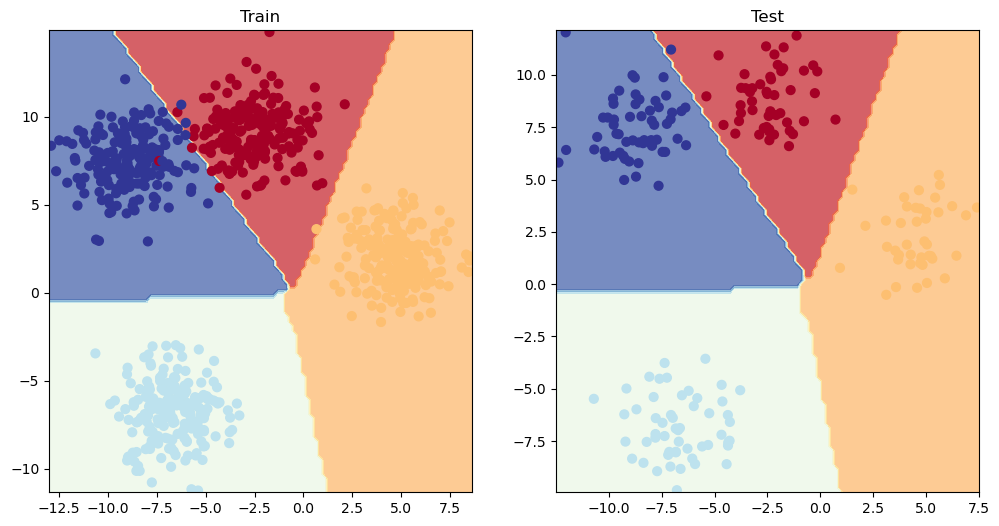

In [35]:
from helper_functions import plot_predictions, plot_decision_boundary

# plot decision boundary in the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [38]:
# check out other metrics
#!pip install torchmetrics

In [45]:
y_preds[0:5]

tensor([1, 3, 2, 1, 0], device='cuda:0')

In [46]:
y_blob_test[0:5]

tensor([1, 3, 2, 1, 0], device='cuda:0')

In [50]:
from torchmetrics import Accuracy
torchmetric_accuracy = Accuracy(task='multiclass', num_classes=4)
torchmetric_accuracy(y_preds, y_blob_test)
print(torchmetric_accuracy.metrics["accuracy"])


RuntimeError: Encountered different devices in metric calculation (see stacktrace for details). This could be due to the metric class not being on the same device as input. Instead of `metric=MulticlassAccuracy(...)` try to do `metric=MulticlassAccuracy(...).to(device)` where device corresponds to the device of the input.